In [1]:
using ForwardDiff
using Base.Test
using Plots

In [2]:
J(x) = sum(x)
c(x) = x[1]^2 + x[2]^2 -2

dJ(x) = [1 1]'
dC(x) = 2*x
hJ(x) = zeros(2,2)
hC(x) = 2*eye(2)

x = rand(2,1)
ForwardDiff.gradient(J,x)
@test ForwardDiff.gradient(c,x) ≈ dC(x)
@test ForwardDiff.hessian(J,x) ≈ hJ(x)
@test ForwardDiff.hessian(c,x) ≈ hC(x)

μ = 5
Q(x) = J(x) + μ/2*c(x)^2
dQ(x) = dJ(x) + μ*c(x)*dC(x)
hQ(x) = hJ(x) + μ*c(x)*hC(x) + μ*dC(x)*dC(x)'
@test ForwardDiff.gradient(Q,x) ≈ dQ(x)
@test ForwardDiff.hessian(Q,x) ≈ hQ(x)

Test Passed

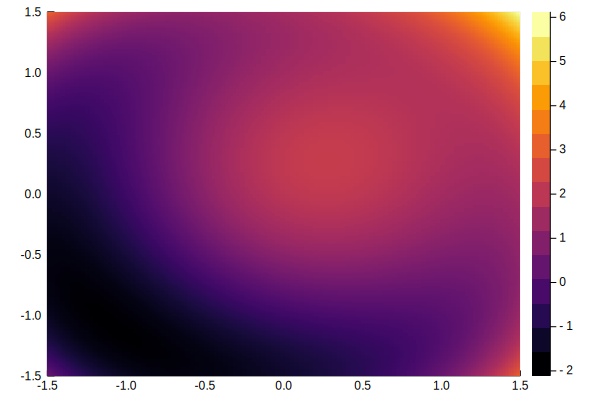

In [3]:
μ = 1
N = 100
X = linspace(-1.5,1.5,N)
Y = linspace(-1.5,1.5,N)
Qval = zeros(N,N)
Q2(x,y) = Q([x;y])
for i = 1:N
    for j = 1:N
        x = [X[i]; Y[j]]
        Qval[i,j] = Q(x)
    end
end
contourf(X,Y,Q2)

In [170]:
function solve_penalty(J,c;num_iter=100,μ=1)
    function print_stats()
        println("Final Value: $x")
        println("Final Cost: $(Q(x))")
        println("Final mu: ", μ)
        println("Final C: $(c(x))")
        println("k: $k/$(length(tau))")
        println("Iterations: $iter")
    end
    
    tau = logspace(1,-5,30)
    k = 1
    
    Q(x) = J(x) + μ/2*c(x)^2
    dQ(x) = ForwardDiff.gradient(Q,x)
    hQ(x) = ForwardDiff.hessian(Q,x)
    p(x) = -inv(hQ(x))*dQ(x)
    
    x_prev = ones(n)*Inf
    X = zeros(n,num_iter)
    cost = zeros(num_iter)
    P = zeros(n,num_iter)
    x = copy(x0)
        
    for iter = 1:num_iter
        px = p(x)
        x += α*px
        
        cost[iter] = J(x)
        X[:,iter] = x
        P[:,iter] = px
        
        if norm(dQ(x)) <= tau[k]
            k += 1 # Decrease tolerance
            μ *= 2
        end
        if norm(x-x_prev) < 1e-8
            println("Tolerance Condition Hit")
            print_stats()
            return X,P,cost
        end
        x_prev = copy(x)
    end
    iter = num_iter
    print_stats()
    return X,P,cost
end


function plotQ(f,c,μ)
    Q(x) = J(x) + μ/2*c(x)^2
    Q2(x,y) = Q([x;y])
    Xs = linspace(-1.5,1.5,N)
    Ys = linspace(-1.5,1.5,N)
    plt = contourf(Xs,Ys,Q2)
end

function solve_AL(f,c,x0;num_iter=100,μ=1)
    function print_stats()
        println("Final Value: $x")
        println("Final Cost: $(L(x))")
        println("Final mu: ", μ)
        println("Final C: $(c(x))")
        println("k: $k/$(length(tau))")
        println("Iterations: $iter")
        println("eps: $(norm(x-x_prev))")
    end
    
    tau = logspace(1,-5,30)
    k = 1
    λ = 0
    
    L(x) = J(x) + μ/2*c(x)^2 - λ*c(x)
    dL(x) = ForwardDiff.gradient(L,x)
    hL(x) = ForwardDiff.hessian(L,x)
    p(x) = -inv(hL(x))*dL(x)
    
    x_prev = ones(n)*Inf
    X = zeros(n,num_iter)
    cost = zeros(num_iter)
    P = zeros(n,num_iter)
    x = copy(x0)
        
    for iter = 1:num_iter
        println(x)
        px = p(x)
        x += α*px
        if norm(dL(x)) < tau[k]
            k += 1
            λ += -μ*c(x)
            μ *= 2
        end
        
        if norm(x-x_prev) < 1e-8 || abs(c(x)) < 1e-6
            println("Tolerance Condition Hit")
            print_stats()
            return X,P,cost
        end
        
        cost[iter] = J(x)
        X[:,iter] = x
        P[:,iter] = px
        
        x_prev = copy(x)
    end
    iter = num_iter
    print_stats()
    return X,P,cost
end
    


solve_AL (generic function with 2 methods)

In [172]:
# J(x) = sum(x)
# c(x) = x[1]^2 + x[2]^2 -2
J(x) = x[1]^2 + x[2]^2
c(x) = x[1] + x[2] - 1
n = 2
x0 = -0.6*[1,0.9]
α = 0.5


X, P, cost = solve_penalty(J,c,num_iter=500);
println()
X, P, cost = solve_AL(J,c,x0,num_iter=500);
# plotQ(J,c,1)

Tolerance Condition Hit
Final Value: [0.499998, 0.499998]
Final Cost: 0.49999809266597617
Final mu: 262144
Final C: -3.8221624268919285e-6
k: 19/30
Iterations: 88

[-0.6, -0.54]
[-0.175, -0.145]
[0.189167, 0.204167]
[0.42125, 0.42875]
[0.519884, 0.523634]
[0.569201, 0.571076]
[0.54947, 0.550407]
[0.520289, 0.520757]
[0.505698, 0.505932]
[0.498403, 0.49852]
[0.497323, 0.497381]
[0.498372, 0.498401]
[0.498896, 0.498911]
[0.499576, 0.499583]
[0.499916, 0.499919]
[0.500085, 0.500087]
[0.500085, 0.500086]
[0.500042, 0.500043]
[0.500021, 0.500021]
[0.500005, 0.500005]
[0.499997, 0.499997]
[0.499997, 0.499997]
[0.499998, 0.499998]
[0.499999, 0.499999]
Tolerance Condition Hit
Final Value: [0.5, 0.5]
Final Cost: 0.5000000126090177
Final mu: 16384
Final C: -6.923165811745235e-7
k: 15/30
Iterations: 24
eps: 1.0307604577996285e-6


In [173]:
function plot_step(x,px)
    scatter!([x[1]],[x[2]],color="red",legend=:none)
    plot!([x[1], x[1]+px[1]*α],[x[2], x[2]+px[2]*α],width=2,color="black",legend=:none)
end

N = 100
Xs = linspace(-1.5,1.5,N)
Ys = linspace(-1.5,1.5,N)
Q2(x,y) = Q([x;y])
contourf(Xs,Ys,Q2)

@gif for i = 1:24
    scatter!([X[1,i]],[X[2,i]],color="red",legend=:none)
    end every 1

INFO: Saved animation to /home/bjack205/Documents/Research/JuliaiLQR/tmp.gif


Plots.AnimatedGif("/home/bjack205/Documents/Research/JuliaiLQR/tmp.gif")

In [163]:
X

2×500 Array{Float64,2}:
 14.1463  11.7971  9.84103  8.21293  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 12.7502  10.6328  8.86967  7.40213     0.0  0.0  0.0  0.0  0.0  0.0  0.0